In [1]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as pyplot
import numpy

# Task 1

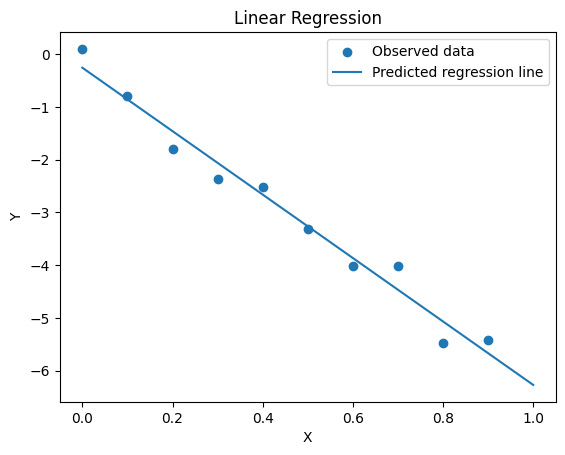

[[-3.14442237]]


In [3]:
#Scatter Plot
x = numpy.load('x_values.npy')
y = numpy.load('y_values.npy')
pyplot.figure()
pyplot.scatter(x, y, label="Observed data")

#Linear Regression
testX = numpy.load('test_x_values.npy')
testY = LinearRegression().fit(x,y).predict(testX)
pyplot.plot(testX, testY, 
    label="Predicted regression line")
pyplot.title("Linear Regression")
pyplot.xlabel("X")
pyplot.ylabel("Y")
pyplot.legend()
pyplot.show()

#Predict
print(LinearRegression().fit(x,y).predict([[0.48]]))

# Task 2

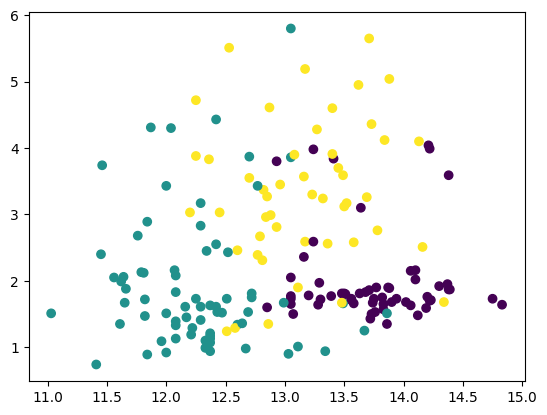

[[1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.182e+01 1.720e+00 1.880e+00 ... 9.400e-01 2.440e+00 4.150e+02]
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]
 ...
 [1.225e+01 1.730e+00 2.120e+00 ... 1.000e+00 3.170e+00 5.100e+02]
 [1.330e+01 1.720e+00 2.140e+00 ... 1.020e+00 2.770e+00 1.285e+03]
 [1.251e+01 1.240e+00 2.250e+00 ... 7.500e-01 1.510e+00 6.500e+02]]
[2 1 2 2 2 2 1 2 0 2 0 0 0 1 2 2 0 0 2 0 2 2 0 1 1 0 1 2 0 0 2 1 0 0 2 0 0
 2 1 0 0 1 1 0 1 0 0 2 2 1 1 1 2 0 1 2 0 2 2 0 0 1 1 0 1 0 1 1 0 2 1 1 1 1
 0 1 2 0 2 1 1 1 1 2 0 0 1 2 0 1 0 0 0 0 1 1 0 2 2 0 1 0 2 2 0 2 0 1 1 0 0
 1 1 1 0 2 1 0 1 1 1 1 1 1 2 1 1 2 2 1 0 1 1 2 1 1 0 1 2 2 1 0 1 1 2 0 0 2
 0 2 2 1 2 1 0 1 1 2 1 1 0 1 0 1 1 1 2 0 1 2 0 0 1 0 1 1 0 2]


In [19]:
##List of wines which has a list of attributes
##Three Groups of Wine
data = numpy.load('wineData.npy')
labels = numpy.load('wineLabels.npy')
pyplot.figure()
pyplot.scatter(data[:,0], data[:,1], c=labels)
pyplot.show()
print(data)
print(labels)

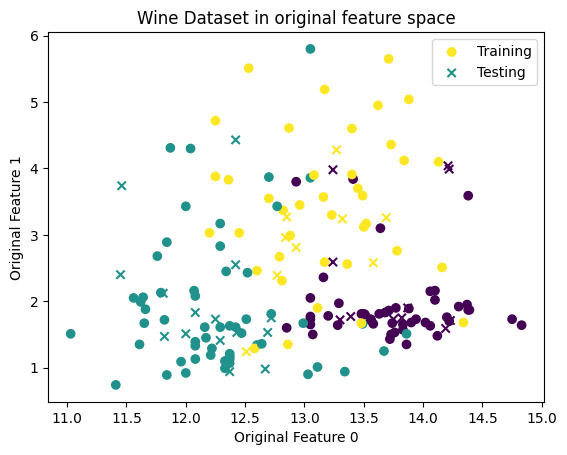

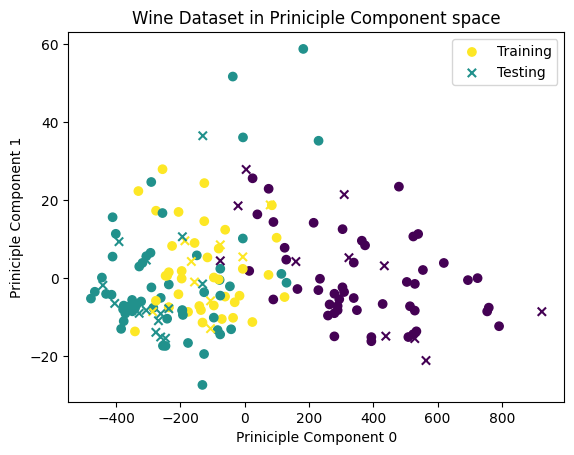

In [42]:
#Original Data
data = numpy.load('wineData.npy')
split = math.ceil(len(data) * 0.8)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('wineLabels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

#Orginal Scatter
pyplot.figure()
pyplot.scatter(train_data[:,0], train_data[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(test_data[:,0], test_data[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.title("Wine Dataset in original feature space")
pyplot.xlabel("Original Feature 0")
pyplot.ylabel("Original Feature 1")
pyplot.legend()
pyplot.show()

#PCA Data
pca = PCA(n_components=2).fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)

#PCA Scatter
pyplot.figure()
pyplot.scatter(train_pca[:,0], train_pca[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(test_pca[:,0], test_pca[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.title(
    "Wine Dataset in Priniciple Component space")
pyplot.xlabel("Priniciple Component 0")
pyplot.ylabel("Priniciple Component 1")
pyplot.legend()
pyplot.show()

# Task 3

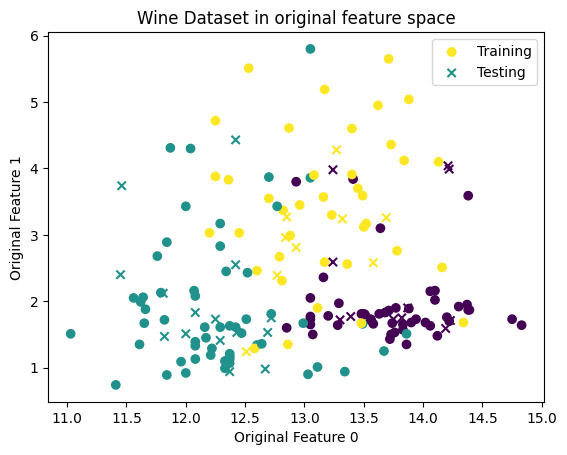

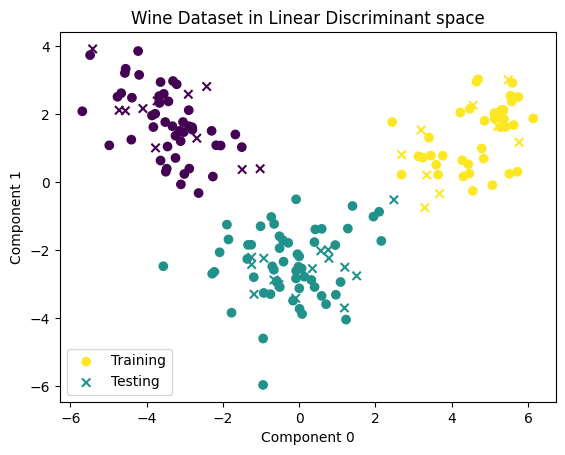

In [41]:
#Original Data
data = numpy.load('wineData.npy')
split = math.ceil(len(data) * 0.8)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('wineLabels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

#Orginal Scatter
pyplot.figure()
pyplot.scatter(train_data[:,0], train_data[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(test_data[:,0], test_data[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.title("Wine Dataset in original feature space")
pyplot.xlabel("Original Feature 0")
pyplot.ylabel("Original Feature 1")
pyplot.legend()
pyplot.show()

#LDA Data (Bases values on the groups)
lda = LinearDiscriminantAnalysis(n_components=2).fit(
    train_data, train_labels)
train_lda = lda.transform(train_data)
test_lda = lda.transform(test_data)

#PCA Scatter
pyplot.figure()
pyplot.scatter(train_lda[:,0], train_lda[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(test_lda[:,0], test_lda[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.title(
    "Wine Dataset in Linear Discriminant space")
pyplot.xlabel("Component 0")
pyplot.ylabel("Component 1")
pyplot.legend()
pyplot.show()

PCA appears to take just the values into account whereas LDA takes into account the different groups of values

# Task 4

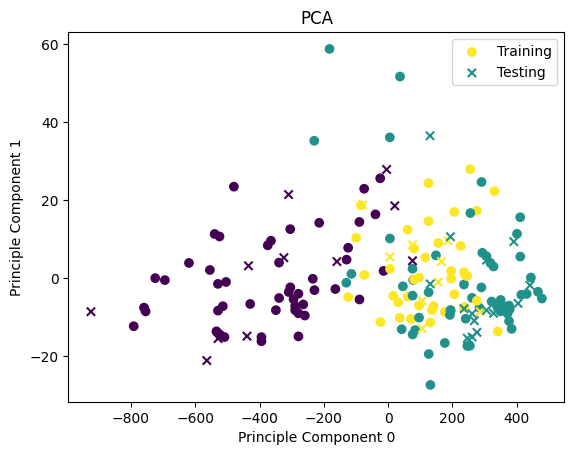

In [41]:
#Data
data = numpy.load('wineData.npy')
labels = numpy.load('wineLabels.npy')
split = math.ceil(len(data) * 0.8)
train_data = data[:split]
test_data = data[split:]
train_labels = labels[:split]
test_labels = labels[split:]

#Mean Vector
mean_vector = numpy.array(train_data).mean(0)

#Projection Matrix
mean_centre = train_data - mean_vector
svd = numpy.linalg.svd(mean_centre)
projection_matrix = svd[2][:2]
projected_train_data = mean_centre @ numpy.transpose(projection_matrix)  

#Test Data
test_centre = test_data - mean_vector
projected_test_data = test_centre @ numpy.transpose(projection_matrix)

#Scatter
pyplot.figure()
pyplot.scatter(projected_train_data[:,0], 
               projected_train_data[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(projected_test_data[:,0], 
               projected_test_data[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.title("PCA")
pyplot.xlabel("Principle Component 0")
pyplot.ylabel("Principle Component 1")
pyplot.legend()
pyplot.show()

# Task 5

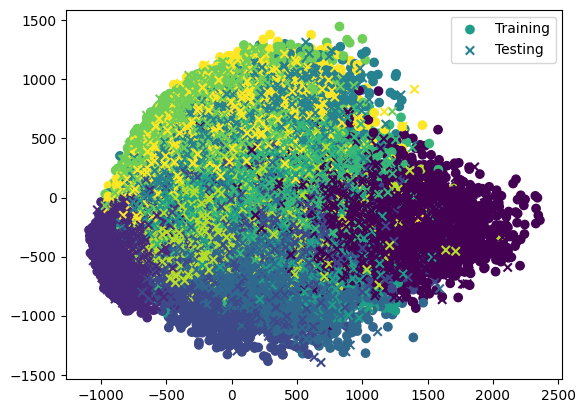

The minuimum number of components needed whilist retaining at least 90% variance is 
87


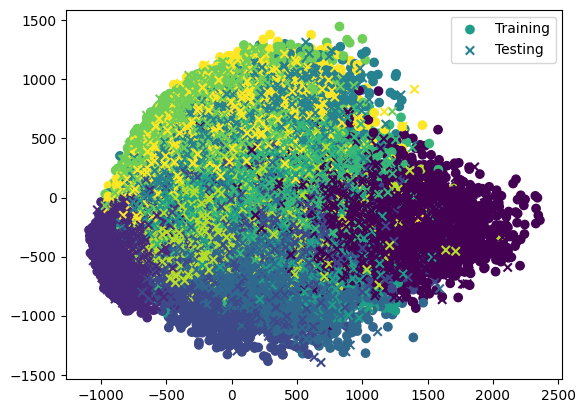

This values from the combined percentage of each components variances which are 
[0.0974151  0.07075601 0.06217803 0.05383784 0.04854975 0.04333487
 0.03271471 0.02889222 0.02767092 0.02368496 0.02103287 0.02019931
 0.0171389  0.01681775 0.01580786 0.01488755 0.01317926 0.01271148
 0.01183839 0.01148197 0.01067252 0.01005789 0.00953962 0.00905564
 0.00883305 0.00837466 0.0081868  0.0078437  0.00741049 0.00691732
 0.00658265 0.0064238  0.00603553 0.00584868 0.00568717 0.00543136
 0.0050546  0.00488691 0.00481101 0.00473239 0.00456044 0.00441046
 0.00416918 0.00396266 0.00384606 0.003744   0.0036095  0.00349808
 0.00339556 0.00321208 0.00318355 0.00310595 0.00294245 0.00288239
 0.00285425 0.00270368 0.00268682 0.00255712 0.00253615 0.00243781
 0.00239857 0.00237664 0.00228693 0.00222025 0.00212674 0.00206723
 0.00203042 0.00197277 0.00192372 0.00188054 0.00186032 0.00181289
 0.00176931 0.00174093 0.0016347  0.0016343  0.00160866 0.00153055
 0.00145686 0.00141146 0.00140173 0.00139321 0.0

In [2]:
#Original Data
data = numpy.load('task3_5_data.npy')
split = math.ceil(len(data) * 0.8)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('task3_5_labels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

#PCA Data Using %
pca = PCA(n_components=0.9).fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)
pyplot.figure()
pyplot.scatter(train_pca[:,0], train_pca[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(test_pca[:,0], test_pca[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.legend()
pyplot.show()
print("The minuimum number of components needed whilist retaining at least 90% variance is ")
print(pca.n_components_)

#PCA Data
pca = PCA(n_components=87).fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)
pyplot.figure()
pyplot.scatter(train_pca[:,0], train_pca[:,1], 
               c=train_labels, label="Training")
pyplot.scatter(test_pca[:,0], test_pca[:,1],
               c=test_labels, marker="x", 
               label="Testing")
pyplot.legend()
pyplot.show()
values = pca.explained_variance_ratio_
sum = 0
for i in range(0,len(values)):
    sum = sum + values[i]
print("This values from the combined percentage of each components variances which are ")
print(values)
print("The total of these percentages is ")
print(sum)